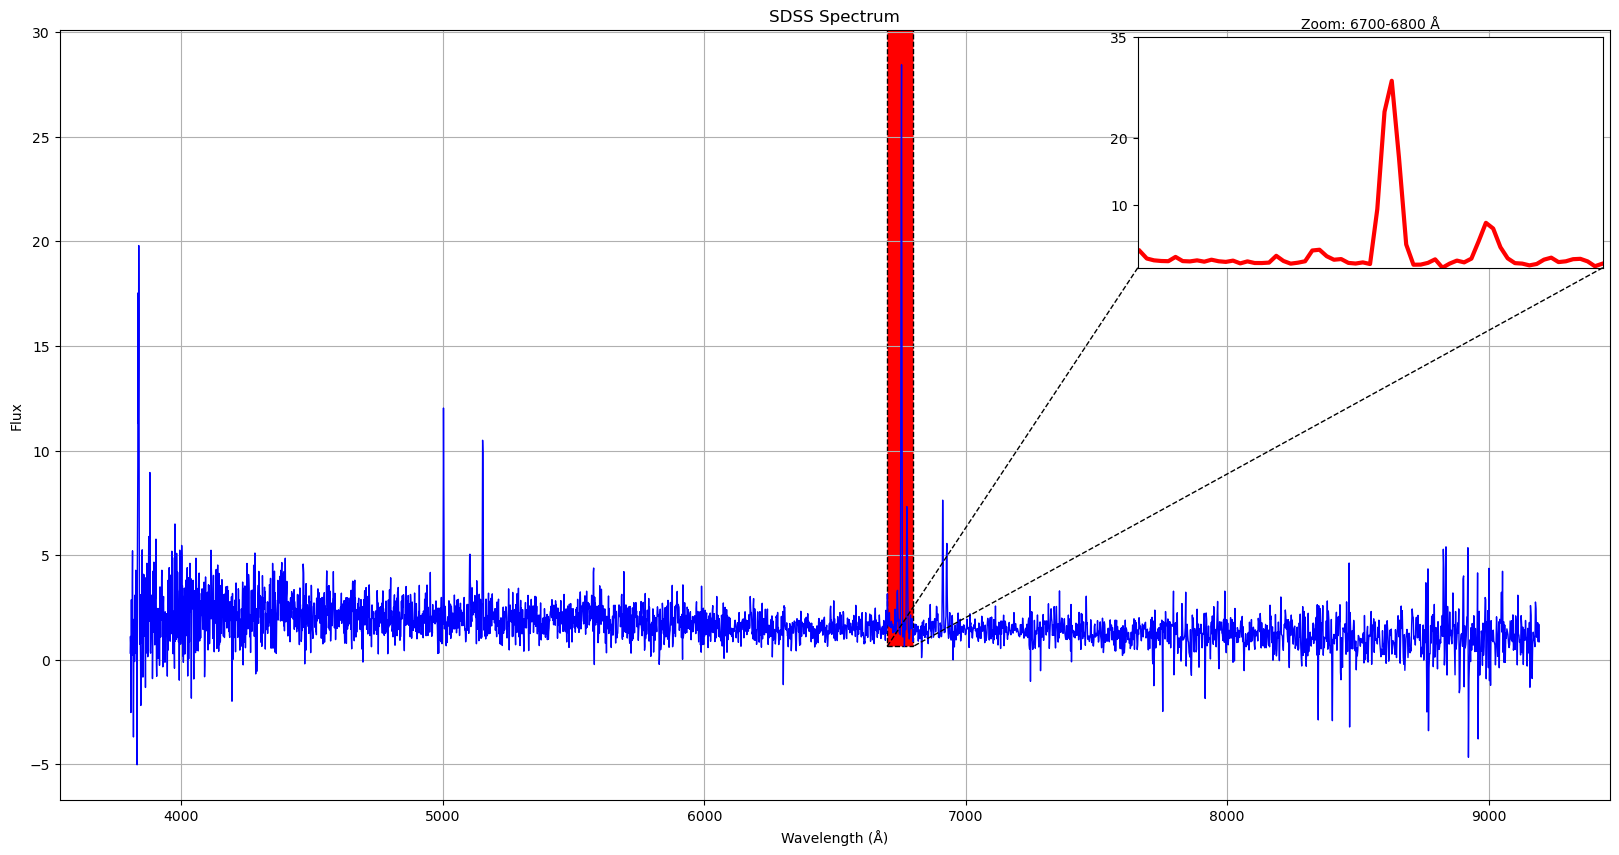

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Open FITS file
hdul = fits.open('spectra.fits')  
data = hdul[1].data  # SDSS spectra are in extension 1
header = hdul[0].header  # Primary header

# Extract spectral axis and flux
log_wavelength = data['loglam']  # Logarithmic wavelength
wavelength = 10 ** log_wavelength  # Convert to linear scale
flux = data['flux']  # Flux values

# Close the FITS file
hdul.close()

# Create main plot using plt
fig, ax = plt.subplots(figsize=(20, 10))  # Store main axes
ax.plot(wavelength, flux, color='b', lw=1)
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Flux')
ax.set_title('SDSS Spectrum')
ax.grid()

# ✅ Define a single zoom-in region (inside 3804 - 9193 Å)
zoom_range = (6700, 6800)  # Only one zoom-in
color = 'r'
location = 'upper right'

# Extract relevant data within the range
zoom_wavelength = wavelength[(wavelength > zoom_range[0]) & (wavelength < zoom_range[1])]
zoom_flux = flux[(wavelength > zoom_range[0]) & (wavelength < zoom_range[1])]

# Create inset plot
inset = inset_axes(ax, width="30%", height="30%", loc=location)
inset.plot(zoom_wavelength, zoom_flux, color=color, lw=3)
inset.set_xlim(zoom_range)
inset.set_ylim(min(zoom_flux), max(zoom_flux))  # No error now!
inset.set_xticks([])
inset.set_yticks([10,20,35])
inset.set_title(f"Zoom: {zoom_range[0]}-{zoom_range[1]} Å", fontsize=10)

# ✅ Draw connecting lines between inset and main plot
mark_inset(ax, inset, loc1=3, loc2=4, fc="red", ec="black", lw=1,ls='--')  # Use 'ax' instead of plt.gca()

plt.show()


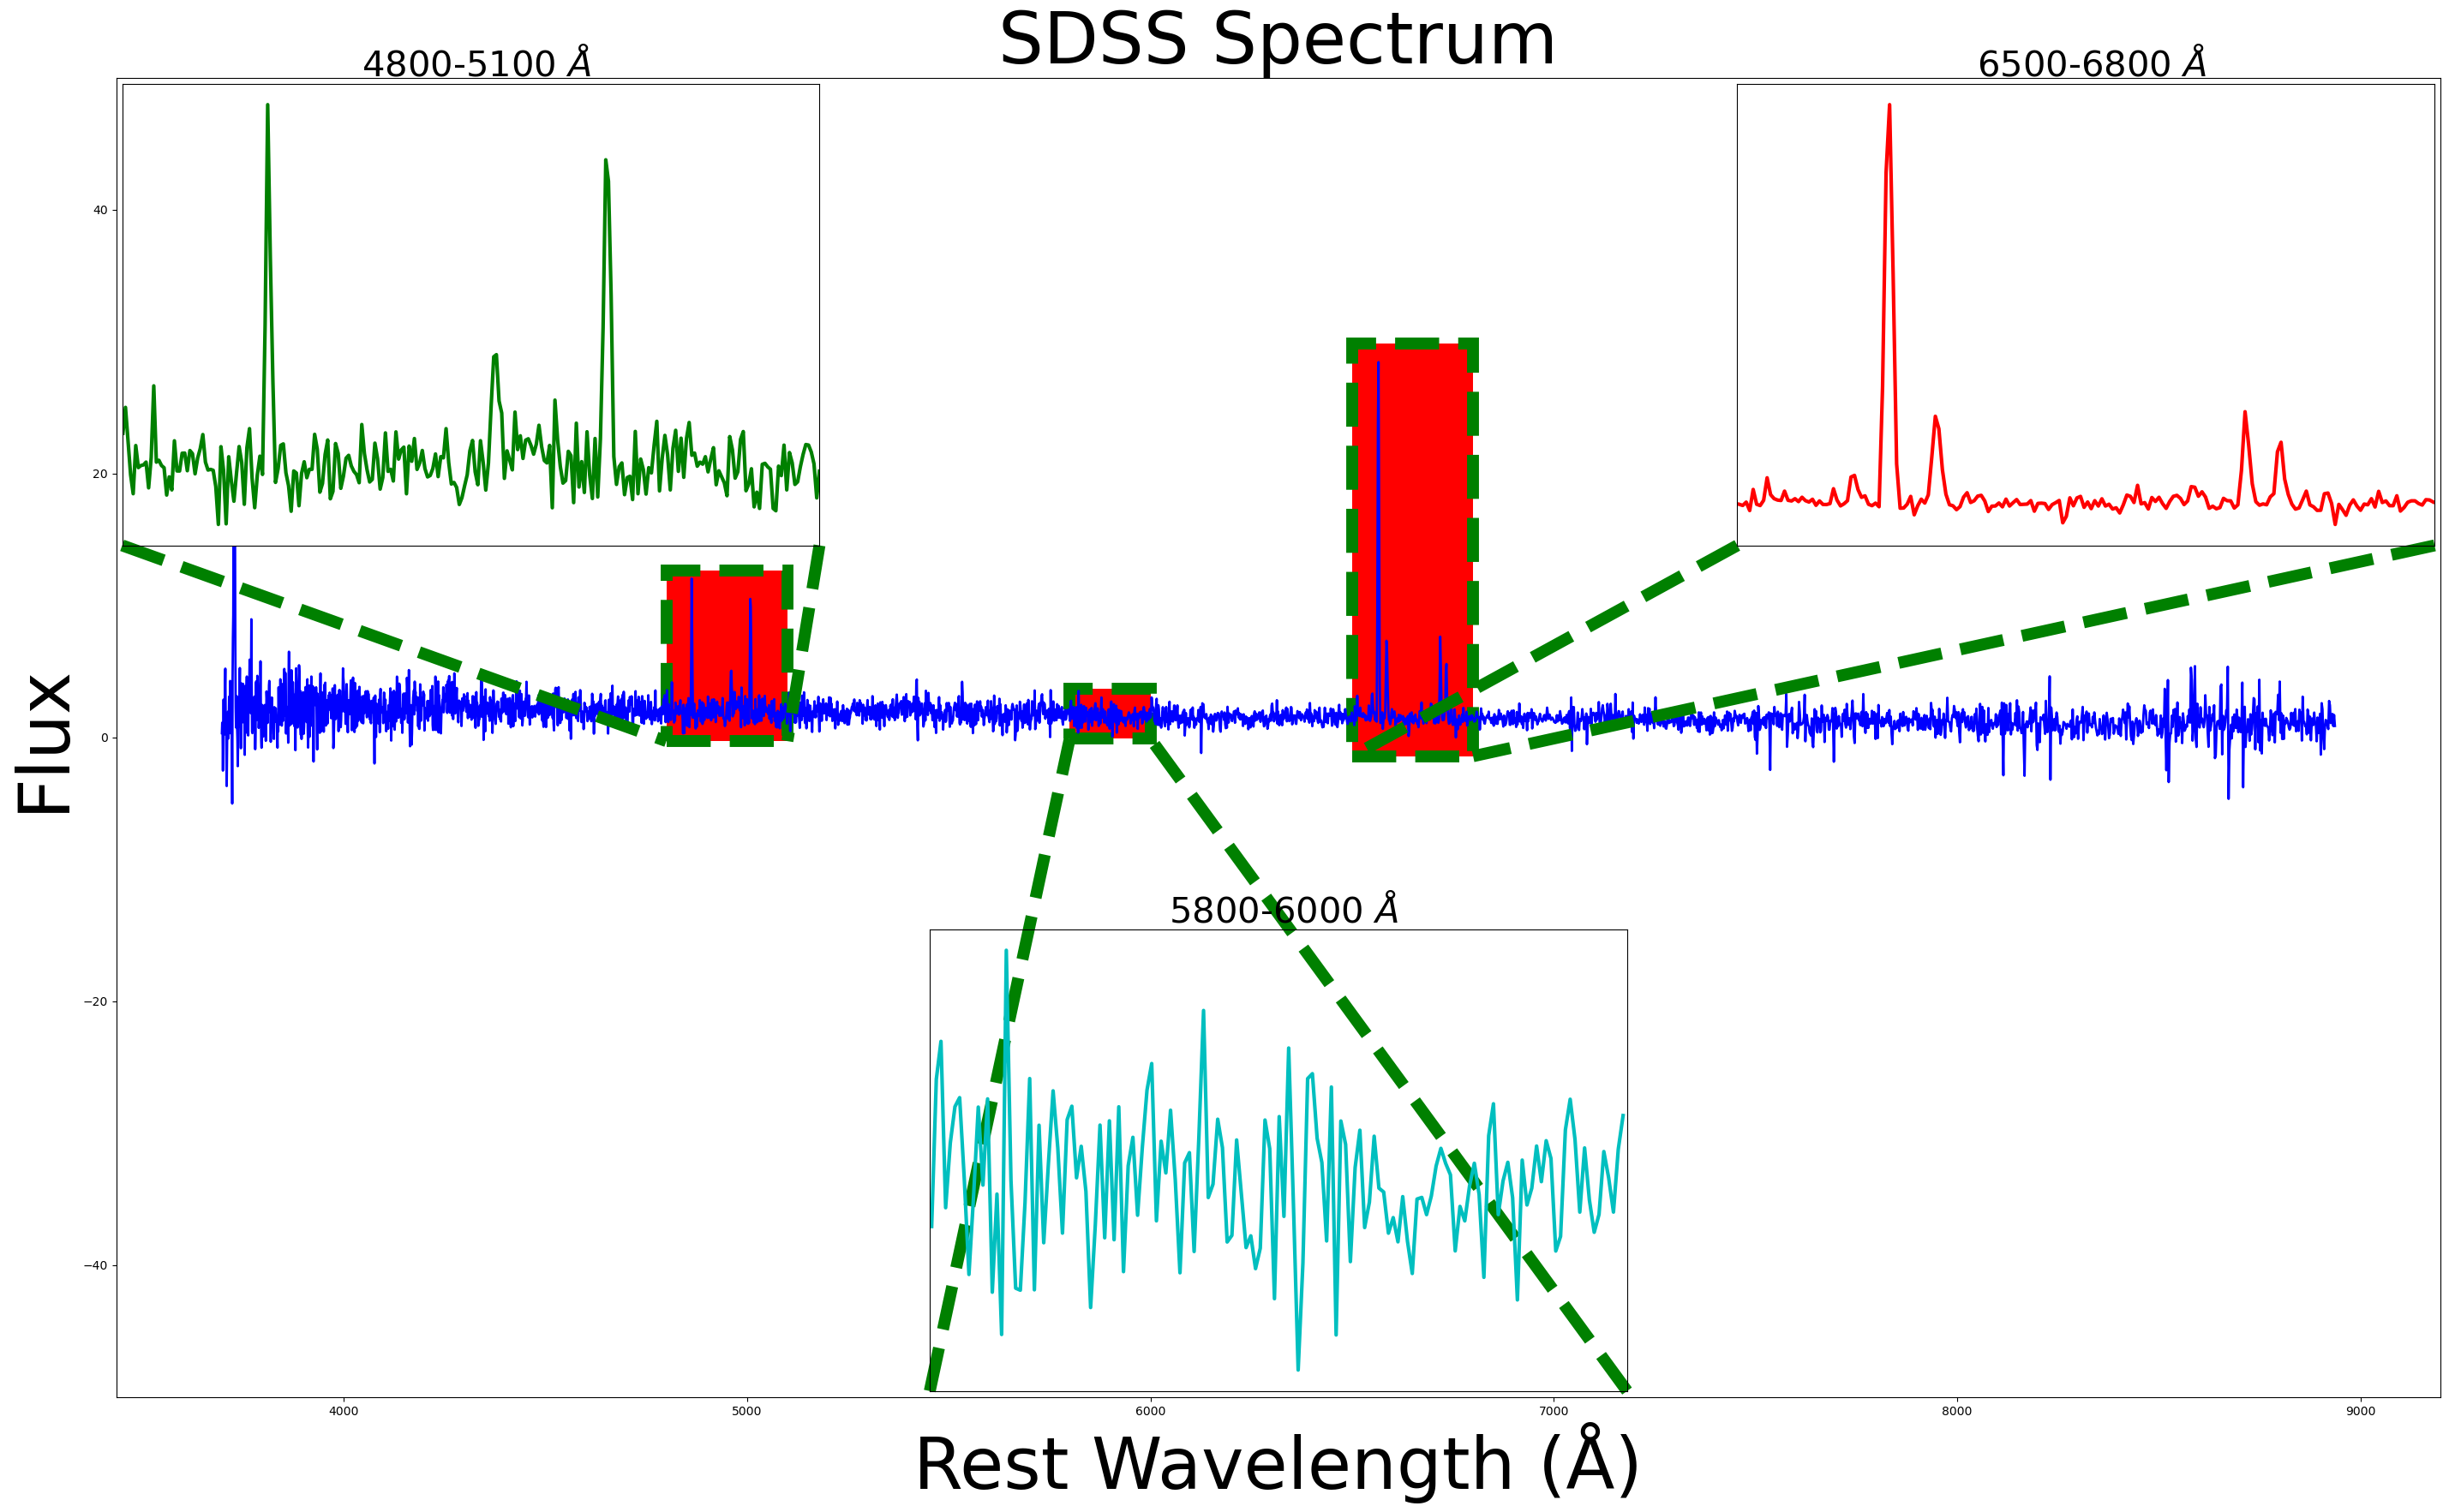

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Open FITS file
hdul = fits.open('spectra.fits')  
data = hdul[1].data  # SDSS spectra are in extension 1
header = hdul[0].header  # Primary header

# Extract spectral axis and flux
log_wavelength = data['loglam']  # Logarithmic wavelength
wavelength = 10 ** log_wavelength/(1+0.0288)  # Convert to linear scale
flux = data['flux']  # Flux values

# Close the FITS file
hdul.close()

# Create main plot using plt
fig, ax = plt.subplots(figsize=(35, 20))  # Store main axes
ax.plot(wavelength, flux, color='b', lw=2)
ax.set_xlabel('Rest Wavelength (Å)',fontsize=60)
ax.set_ylabel('Flux',fontsize=60)
ax.set_title('SDSS Spectrum',fontsize=60)
ax.set_ylim(-50, 50)

#ax.grid()

# ✅ Define two zoom-in regions
zoom_ranges = [(6500, 6800), (4800, 5100),(5800,6000)]  
colors = ['r', 'g','c']  # Different colors for different zoom-ins
locations = ['upper right', 'upper left','lower center']  # Locations of insets

# Loop over both zoom-in regions
for i, zoom_range in enumerate(zoom_ranges):
    color = colors[i]
    location = locations[i]

    # Extract relevant data within the range
    zoom_wavelength = wavelength[(wavelength > zoom_range[0]) & (wavelength < zoom_range[1])]
    zoom_flux = flux[(wavelength > zoom_range[0]) & (wavelength < zoom_range[1])]

    # Create inset plot
    inset = inset_axes(ax, width="30%", height="35%", loc=location)
    inset.plot(zoom_wavelength, zoom_flux, color=color, lw=3)
    inset.set_xlim(zoom_range)
    inset.set_ylim()  # No error now!
    inset.set_xticks([])
    inset.set_yticks([])
    inset.set_title(f" {zoom_range[0]}-{zoom_range[1]} $\AA$", fontsize=30)

    #  Draw connecting lines between inset and main plot
    mark_inset(ax, inset, loc1=3, loc2=4, fc="red", ec="ma", lw=10,ls='--')
plt.savefig('SDSS_zoom_spectra.png',dpi=300)

plt.show()
